# Assignment #3 - Reinforcement Learning

### <font color="red"> DUE: Mar 19 (Monday) 11:00 pm </font>  

<font color="blue">ARUN KUNNUMPURAM THOMAS 801027386 </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

In this assignment I am trying to solve the Maze and BlackJack Game using Reinforcement Learning. In this assignment I will create One Maze Reinforcement Agent for a given maze environment and BlackJack agent for Black Jack game. For training the Reinforcement learning I am using SARSA and Q-Learning algorithms.Ultimate aim for this assignment to find the correct parameters for alpha, gamma,maxiter,maxstep,epsilon which is using for the training of Reinforcement agent.

# II. Problems 

## A. Maze Problem (Practice)

Describe the problem. Read the following code and explain the GridWorld environment. 

Maze problem is to find the path from given start point to the Goal point in the given Maze environment where holes also present in the environment. 
In the given model of Grid environment, an agent can take only 4 action from any state( left, right, up and down). If the agent reach the goal then the agent will get a reward of 30 points. If the agent falls in a hole or he moved out of the grid world then he will reward of -5. Each other step he is taking, he will get reward of -1 point.



In [1]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Sample Grid Environment File

Simple text file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 

In [11]:
%%bash 
cat grid.txt

OOOHOOOOO
OOOHOOHOO
OOOOOOHOO
OOOOHHHOO
OOHOOOOOH
OOHOOOGOO
OOOOOOOOO

### GridWorld Class


In [2]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

In [3]:
env = GridWorld("grid.txt")
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


In [4]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

## B. Blackjack-V0

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG)

Now, we play Blackjack! 
https://gym.openai.com/envs/Blackjack-v0/


In BlackJack game, a player is playing against a fixed dealer and the aim of the game is to reach card sum of 21 or close to 21.Face card (Jack, Queen, King) have point of 10. Aces can be used as 11 or 1. It is known as usable if player use it for the value 11. In this game there is infinite supply of card to player. When the game start the player wull get two cards and dealer also will get two cards. One of them will be face up and one will be face down. A player can take only two actions in this gamme Hit or Stick.Hit means requesting for new cards and Stick means stop the game.  After the player stick the game, dealer will reveals the his facedown card and draws card until the sum is 17 or greater. If the dealer goes bust the player wins. If neither player nor dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21. The reward for winning is +1, drawing is 0, and losing is -1.


# III. Methods

- Decide your TD learning approach: SARSA or Q-learning? 
- Describe your approach and the reason why you select it.
- Finish epsilon_greedy function and other TODOs. Explain it.
- Explain your codes.

-For Maze problem, I am using SARSA for training the RL Agent and For BlackJack, I am using Q Learning for the RL Agent.

# SARSA AND Q LEARNING ALGORITHM
Updating the Q values with TD learning is similar to previous update with two different considerations. 
First, we update the Q with assumption that we follow a certain behavior policy. Thus, we call this as *on-policy control*, or **SARSA**. 

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$

Next, without making assumption of behavior policy, we can explore other possible policies to update the Q. We call this as *off-policy control*, or **Q-learning**. 


$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$


I am using SARSA for MAZE problem because, because SARSA is more conservative algorithm than Q learning. Since there are holes and moving out of environment possibilities, its better to choose a conservative algorithm. SARSA will avoid optimal danger path and it slowly learn about the path when learning is going on. Here our aim is to reach the goal without falling into hole or moving outward. So I am using SARSA.

I am using Q Learing for BlackJack environment, since Q learning learn the optimal policy faster than SARSA. Since the BlackJack environment is a faster iterating environment , I think Q learning is better option

## RLAgent for Maze

Read the understand the codes below and explain it with your words. 
Do NOT forget to answer the question. 

RLAgent has mainly four methods. __init__ , epsilon_greed, train and test. 
In __init__ method we are initializing the GridEnvironment and Q table. We are getting the actions defined in the environemnt and size of the enviroment. In epsilon_greed function, if the randomly generated number is lesser than the 
epsilon value, then the function return a randomly selected actions defined in the envrionment for the state. If the randomly generated number is greater than epsilon, then function will return the action which has high Q value.

In train method, for the given start point,gamma,alpha,epsilon,maziter and maxstep parameter , I am traning the RL agent and updating the Q table using SARSA algorithm. I am using decrementing epsilon value after we reach 80% iteration. i.e, we will start with high value of epsilon and then we reduce it. Initially we are exploring more and then we will reduce the exploration after certain number of steps. It will return the totalreward earned, path agent took to reach goal from start and the number of steps the agent took to reach goal for each episode.

In test method, for a given start point, Agent will take actions which has high Q value defined in the Q table and try to reach Goal point.

In [47]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, env):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
    
    def epsilon_greed(self, epsilon, s):
        # TODO: Finish this function
         if np.random.rand() < epsilon:
            val=np.random.randint(self.n_a)
            return val
         else:
            return np.argmax(self.Q[s[0],s[1],:])
    
    def train(self, start, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):
            
            if( maxiter- j) > 0.8 * maxiter:
                epsilon=epsilon-((0.1* epsilon) / (0.3* maxiter))
            elif ( maxiter- j) > 0.2 * maxiter:
                epsilon=epsilon-((0.8* epsilon) / (0.4* maxiter))
            elif ( maxiter- j) > 0:
                epsilon=epsilon-((0.1* epsilon) / (0.3* maxiter))
            else:
                epsilon=0.0
                alpha=0.0
            
            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)
            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)

                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))

                # TODO: FINISH SARSA/Q-learning Rule here
                # update self.Q table 
                self.Q[s[0],s[1],a]+= alpha*(r+gamma*self.Q[s1[0],s1[1],a1]-self.Q[s[0],s[1],a])
                if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    #print("Success")
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1
            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
        # TODO: Add your test routine that exmines learned policy
        #      Using the learned policy, generate the trajectory of 
        env.init(start)
        s=env.get_cur_state()
        a=np.argmax(self.Q[s[0],s[1],:])
        rewards=[]
        trace=np.array(coord_convert(s,self.size))
        for step in range(maxstep):
            r= env.next(a)
            s1 = env.get_cur_state()
            a1 = np.argmax(self.Q[s1[0],s1[1],:])
            rewards.append(r)
            trace = np.vstack((trace, coord_convert(s1, self.size)))
            s=s1
            a=a1

        return trace            

.L## RLAgent for Gym (Blackjack-V0).L;//

BlackJack Agent has mainly four methods. init ,epsilon_greed,findMax, train and test. In init method we are initializing the BlackJack and Q Table(dcitionary). We are getting the actions defined in the environemnt and size of the enviroment. 

In epsilon_greed function, if the randomly generated number is lesser than the epsilon value, then the function return a randomly selected actions defined in the envrionment for the state. If the randomly generated number is greater than epsilon, then I am calling findMax method which will return the action which has high Q value.

In train method, for the given start point,gamma,alpha,epsilon,maziter and maxstep parameter , I am traning the blackjack agent and updating the Q table using Q-learning algorithm. I am decrementing epsilon value after we reach 80% iteration. i.e, we will start with high value of epsilon and then we reduce it. Initially we are exploring more and then we will reduce the exploration after certain number of steps. Train method will return the average reward sum ( totalreward/maxiter)

In test method, we are playing 100 games against dealer and the function will return the total reward which you got after the 100 round. Also it logs the action taken by agent for each game and the final status of each game.

In [52]:
class BJAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, env):
        self.env = env
        #self.size = env.get_size()
        self.n_a = env.action_space.n
        self.avl_actions=list(range(env.action_space.n))
        # self.Q table including the surrounding border
        self.Q = dict()
    
    def epsilon_greed(self, epsilon, observation):
        # TODO: Finish this function
            
        if np.random.rand() < epsilon:
            if(observation not in self.Q):
                self.Q[observation]=dict((action,0.0) for action in self.avl_actions)
            return np.random.randint(self.n_a)
            
        else:
            val=self.findMax(observation)
            return val
    
    def findMax(self,observation):
        if(observation not in self.Q):
            self.Q[observation]=dict((action,0.0) for action in self.avl_actions)
        val=np.random.choice([k for k in self.Q[observation].keys()
                                    if self.Q[observation][k] == max(self.Q[observation].values()) ])
        return val
        
    def train(self,**params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        #observation=self.env.reset()
        totalRewards=[]
        for j in range(maxiter):
            step=1
            rewards = []
            observation=self.env.reset()
            if( maxiter- j) > 0.8 * maxiter:
                epsilon=epsilon-((0.1* epsilon) / (0.3* maxiter))
            elif ( maxiter- j) > 0.2 * maxiter:
                epsilon=epsilon-((0.8* epsilon) / (0.4* maxiter))
            elif ( maxiter- j) > 0:
                epsilon=epsilon-((0.1* epsilon) / (0.3* maxiter))
            else:
                epsilon=0.0
                alpha=0.0
            while step<maxstep:
                
                a=self.epsilon_greed(epsilon,observation)
                new_observation, reward, isGameDone, _=self.env.step(a)
                
                self.Q[observation][a] += alpha * (reward
                                                     + (gamma * self.findMax(new_observation))
                                                     - self.Q[observation][a])
        
                observation=new_observation
                if isGameDone:
                    observation = self.env.reset()
                    rewards.append(reward)
                    break
            totalRewards.append(np.sum(rewards))  
        print("The total Reward is ",np.sum(totalRewards))
        print("The avg is ",np.sum(totalRewards)/maxiter)
        return totalRewards
    def test(self):
        observationTest=self.env.reset()
        i=0
        rewardTest=[]
        print("Game",i+1)
        while i<100:
        
            print("player hand sum",observationTest[0])
            print("dealer one face up hand",observationTest[1])
            print("Usable Ace card",observationTest[2])
            a=self.findMax(observationTest)
            if a==0:
                print("action : stick")
            else:
                print("action : hit")
             
            new_observation, reward, isGameDone, _=self.env.step(a)
            observationTest=new_observation
            if isGameDone:
                print("game is over")
                if reward>0 :
                    print("You Won")
                elif reward==-1:
                    print("You Lost")
                else:
                    print("Draw")
                print(" final player hand sum",observationTest[0])
                print(" final reward",reward)  
                observationTest = self.env.reset()
                i=i+1
                print("Game",i+1)
                rewardTest.append(reward)
        return rewardTest      
      

# IV - Results

- Describe the choice of your parameters for $\gamma$, $\alpha$, and $\epsilon$. 
  - Run experiments to find good parameters
  - Show the experimental outputs to show the process of your selection
- Visualize the results and explain outputs (even from mine.)
  - Run the codes and tell me what you observe
  - Add more visualizations to enrich your explanation.

{### Utility functions for Plotting

- finish the TODOs here for plotting

In [16]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221)
    # TODO: plot rewards 
    plt.plot(rtrace)
    plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(222)
    # TODO: plot steps
    plt.plot(steps)
    plt.ylabel("# steps")

    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()

### Training and Testing with GridWorld

In [63]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.9, 
                                   maxiter=100, 
                                   maxstep=1000)

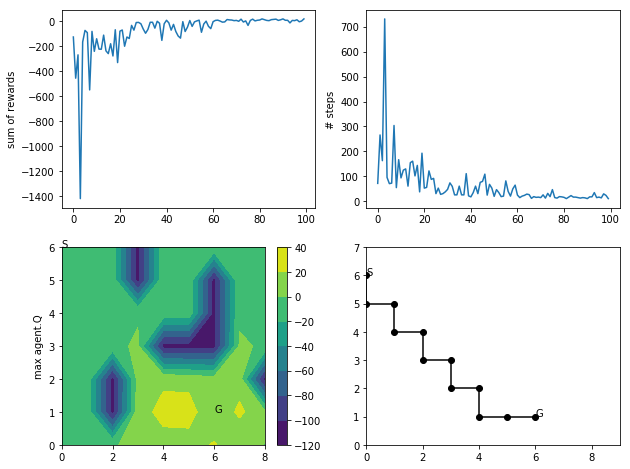

In [64]:
plot_train(agent, rtrace, steps, trace, start)

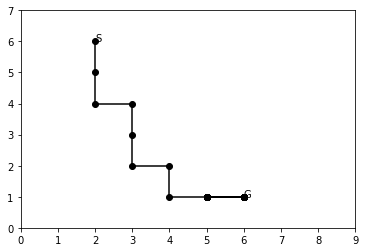

In [65]:
test_start = [0,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

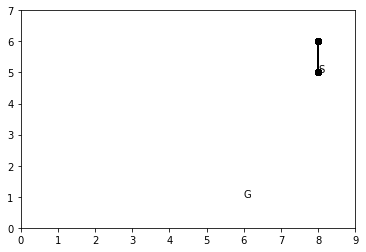

In [66]:
test_start = [1,8]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

### Training and Testing for Black Jack

In [53]:
import gym
from gym import spaces
from gym.utils import seeding

In [54]:
envb=gym.make('Blackjack-v0')

In [55]:
bjagent = BJAgent(envb)
totalRewards=bjagent.train(gamma=0.99, alpha=0.1, epsilon=0.1, maxiter=100, maxstep=1000)

The total Reward is  -37.0
The avg is  -0.37


Text(0,0.5,'sum of rewards')

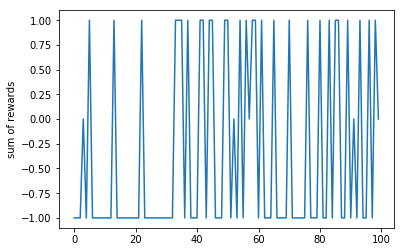

In [56]:
plt.plot(totalRewards)
plt.ylabel("sum of rewards")

In [57]:
rewardTest=bjagent.test()

Game 1
player hand sum 14
dealer one face up hand 10
Usable Ace card True
action : hit
player hand sum 14
dealer one face up hand 10
Usable Ace card False
action : hit
game is over
You Lost
 final player hand sum 24
 final reward -1
Game 2
player hand sum 10
dealer one face up hand 1
Usable Ace card False
action : hit
player hand sum 18
dealer one face up hand 1
Usable Ace card False
action : stick
game is over
You Lost
 final player hand sum 18
 final reward -1.0
Game 3
player hand sum 20
dealer one face up hand 8
Usable Ace card False
action : stick
game is over
You Won
 final player hand sum 20
 final reward 1.0
Game 4
player hand sum 13
dealer one face up hand 8
Usable Ace card False
action : stick
game is over
You Won
 final player hand sum 13
 final reward 1.0
Game 5
player hand sum 13
dealer one face up hand 6
Usable Ace card False
action : stick
game is over
You Won
 final player hand sum 13
 final reward 1.0
Game 6
player hand sum 16
dealer one face up hand 10
Usable Ace card 

Text(0,0.5,'win/loss/draw')

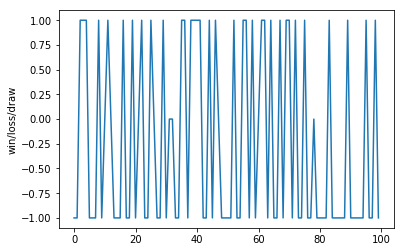

In [58]:
plt.plot(rewardTest)
plt.ylabel("win/loss/draw")

Graph shows the win/loss/draw/BlackJack rate

In [59]:
countRewardTest=[]
countRewardTest.append(rewardTest.count(-1))
countRewardTest.append(rewardTest.count(0))
countRewardTest.append(rewardTest.count(1))
countRewardTest.append(rewardTest.count(1.5))
countRewardTest

[57, 9, 34, 0]

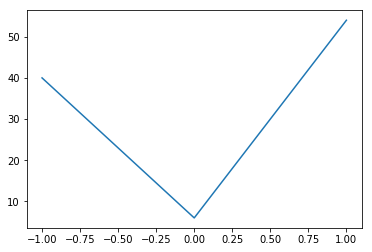

In [25]:
plt.plot([-1,0,1,1.5],countRewardTest)
plt.show()

# Experimentation

# MAZE PROBLEM

In [ ]:
# High Value of alpha  
here I am trying with alpha as 0.9

In [67]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.9, 
                                   epsilon=0.9, 
                                   maxiter=100, 
                                   maxstep=1000)

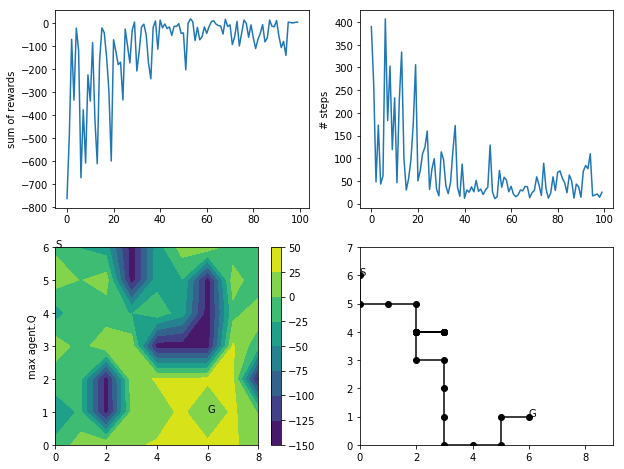

In [68]:
plot_train(agent, rtrace, steps, trace, start)

In [82]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.9, 
                                   maxiter=100, 
                                   maxstep=1000)

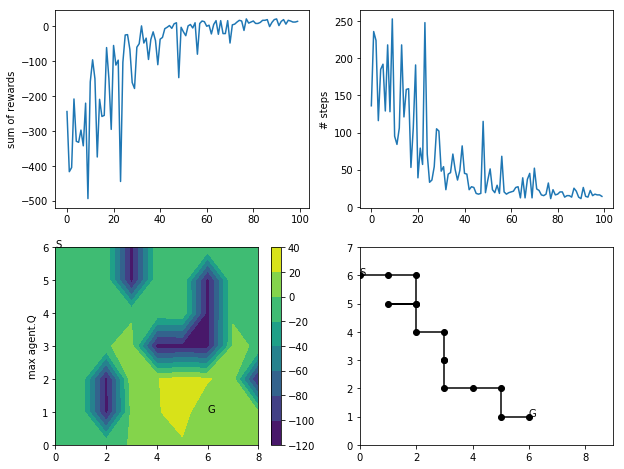

In [83]:
plot_train(agent, rtrace, steps, trace, start)

It seems lower value of alpha is good

In [ ]:
# lower value for gamma

In [76]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.1, 
                                   alpha=0.1, 
                                   epsilon=0.9, 
                                   maxiter=100, 
                                   maxstep=1000)

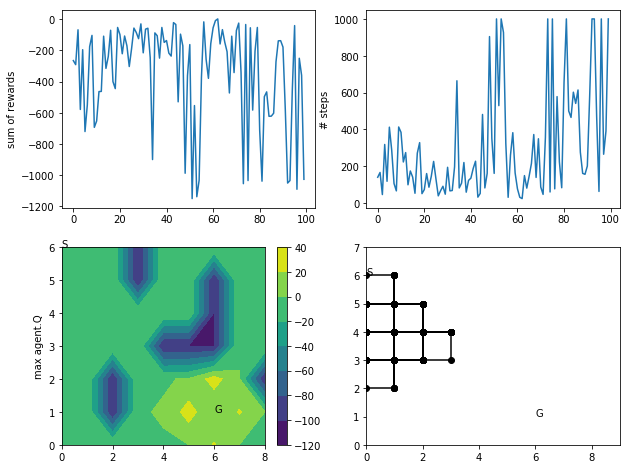

In [77]:
plot_train(agent, rtrace, steps, trace, start)

Lower value of gamma is not good since the steps are not decreasing

Increasing the maxstep value 

In [80]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.9, 
                                   maxiter=100, 
                                   maxstep=100000)

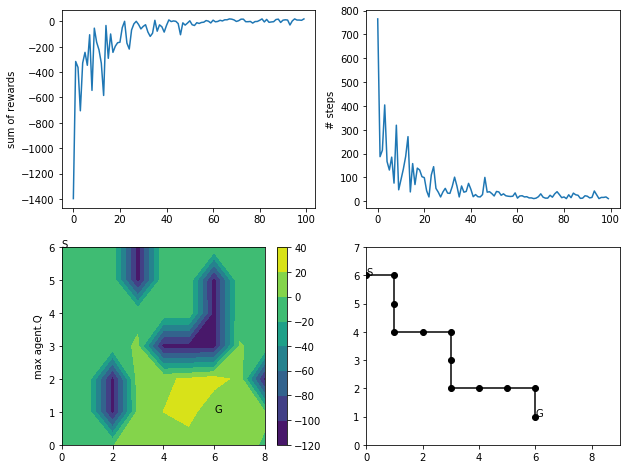

In [81]:
plot_train(agent, rtrace, steps, trace, start)

If the value of Maxstep increases, then the  no of steps to reach the goal for each episode is decreasing very fast.

In [95]:
reward=[]
values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for j in range(9):
    agent = RLAgent(env)
    start = [0,0]
    rtrace, steps, trace = agent.train(start, 
                                   gamma=values[j], 
                                   alpha=0.1, 
                                   epsilon=0.9, 
                                   maxiter=100, 
                                   maxstep=1000)
    reward.append(np.sum(rtrace))

In [96]:
reward.index(np.max(reward))

8

In [97]:
reward

[-38537, -29996, -46431, -35927, -21665, -17205, -10085, -8750, -6421]

In [ ]:
So the value for  gamma =0.9

In [98]:
reward=[]
values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for j in range(9):
    agent = RLAgent(env)
    start = [0,0]
    rtrace, steps, trace = agent.train(start, 
                                   gamma=0.9, 
                                   alpha=values[j], 
                                   epsilon=0.9, 
                                   maxiter=100, 
                                   maxstep=1000)
    reward.append(np.sum(rtrace))

In [99]:
reward.index(np.max(reward))

5

alpha value better one 0.6

In [101]:
reward=[]
values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for j in range(9):
    agent = RLAgent(env)
    start = [0,0]
    rtrace, steps, trace = agent.train(start, 
                                   gamma=0.9, 
                                   alpha=0.6, 
                                   epsilon=values[j], 
                                   maxiter=100, 
                                   maxstep=1000)
    reward.append(np.sum(rtrace))

In [102]:
reward.index(np.max(reward))

0

In [103]:
reward

[660, 539, 403, -698, -676, -1821, -4084, -4998, -5475]

In [ ]:
epsilon is better when its 0.1

# So the choice of parameters are gamma=0.9, alpha =0.6 , epsilon=0.1, maxstep if greater then more good

# Final Plot for Maze

In [126]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.9, 
                                   alpha=0.6, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=100000)

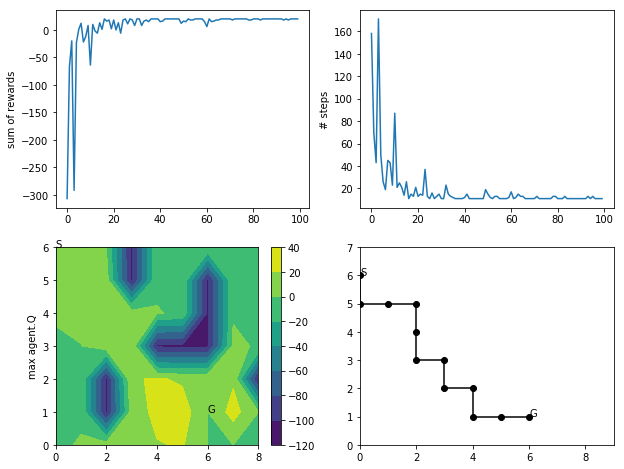

In [127]:
plot_train(agent, rtrace, steps, trace, start)

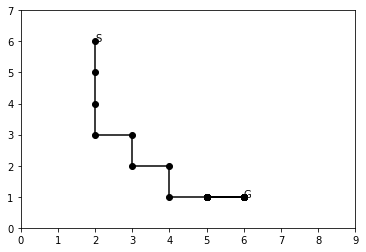

In [128]:
test_start = [0,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

It seems after choosing the right parameters, the expolration is high and no of steps taking for each episode is decreasing very fast

# Black Jack

In [109]:
reward=[]
values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for j in range(9):
    bjagent = BJAgent(envb)
    totalRewards=bjagent.train(gamma=values[j], alpha=0.1, epsilon=0.1, maxiter=100, maxstep=1000)
    reward.append(np.sum(totalRewards))

The total Reward is  -30.0
The avg is  -0.3
The total Reward is  -37.0
The avg is  -0.37
The total Reward is  -35.0
The avg is  -0.35
The total Reward is  -49.0
The avg is  -0.49
The total Reward is  -50.0
The avg is  -0.5
The total Reward is  -31.0
The avg is  -0.31
The total Reward is  -28.0
The avg is  -0.28
The total Reward is  -37.0
The avg is  -0.37
The total Reward is  -36.0
The avg is  -0.36


In [111]:
reward.index(np.max(reward))

6

better value of gamma is 0.7

In [121]:
reward=[]
values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for j in range(9):
    bjagent = BJAgent(envb)
    totalRewards=bjagent.train(gamma=0.7, alpha=values[j], epsilon=0.1, maxiter=100, maxstep=1000)
    reward.append(np.sum(totalRewards))

The total Reward is  -36.0
The avg is  -0.36
The total Reward is  -22.0
The avg is  -0.22
The total Reward is  -38.0
The avg is  -0.38
The total Reward is  -31.0
The avg is  -0.31
The total Reward is  -32.0
The avg is  -0.32
The total Reward is  -26.0
The avg is  -0.26
The total Reward is  -34.0
The avg is  -0.34
The total Reward is  -28.0
The avg is  -0.28
The total Reward is  -21.0
The avg is  -0.21


In [114]:
reward.index(np.max(reward))

7

better value for alpha is 0.8

In [115]:
reward=[]
values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for j in range(9):
    bjagent = BJAgent(envb)
    totalRewards=bjagent.train(gamma=0.7, alpha=0.8, epsilon=values[j], maxiter=100, maxstep=1000)
    reward.append(np.sum(totalRewards))

The total Reward is  -33.0
The avg is  -0.33
The total Reward is  -41.0
The avg is  -0.41
The total Reward is  -32.0
The avg is  -0.32
The total Reward is  -34.0
The avg is  -0.34
The total Reward is  -46.0
The avg is  -0.46
The total Reward is  -30.0
The avg is  -0.3
The total Reward is  -35.0
The avg is  -0.35
The total Reward is  -42.0
The avg is  -0.42
The total Reward is  -43.0
The avg is  -0.43


In [116]:
reward.index(np.max(reward))

5

better value for epsilon is 0.6

   # Choice of parameters are  gamma=0.7, alpha =0.8,epsilon=0.6  maxstep maximum is better

# Final plot for BlackJack

In [118]:
bjagent = BJAgent(envb)
totalRewards=bjagent.train(gamma=0.7, alpha=0.8, epsilon=0.6, maxiter=100, maxstep=1000)
reward.append(np.sum(totalRewards))

The total Reward is  -36.0
The avg is  -0.36


Text(0,0.5,'sum of rewards')

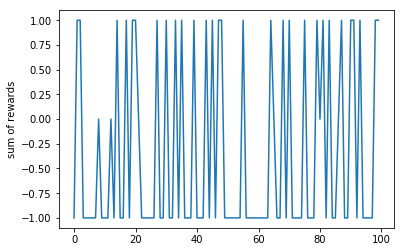

In [119]:
plt.plot(totalRewards)
plt.ylabel("sum of rewards")

In [122]:
rewardTest=bjagent.test()

Game 1
player hand sum 14
dealer one face up hand 10
Usable Ace card False
action : stick
game is over
You Lost
 final player hand sum 14
 final reward -1.0
Game 2
player hand sum 10
dealer one face up hand 10
Usable Ace card False
action : hit
player hand sum 13
dealer one face up hand 10
Usable Ace card False
action : hit
player hand sum 20
dealer one face up hand 10
Usable Ace card False
action : stick
game is over
Draw
 final player hand sum 20
 final reward 0.0
Game 3
player hand sum 9
dealer one face up hand 10
Usable Ace card False
action : hit
player hand sum 12
dealer one face up hand 10
Usable Ace card False
action : stick
game is over
You Lost
 final player hand sum 12
 final reward -1.0
Game 4
player hand sum 16
dealer one face up hand 10
Usable Ace card False
action : hit
game is over
You Lost
 final player hand sum 26
 final reward -1
Game 5
player hand sum 13
dealer one face up hand 5
Usable Ace card False
action : stick
game is over
You Lost
 final player hand sum 13
 f

game is over
You Lost
 final player hand sum 13
 final reward -1.0
Game 101


Text(0,0.5,'win/loss/draw')

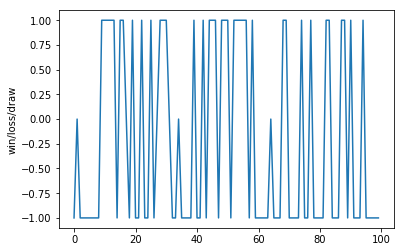

In [123]:
plt.plot(rewardTest)
plt.ylabel("win/loss/draw")

In [131]:
countRewardTest=[]
countRewardTest.append(rewardTest.count(-1))
countRewardTest.append(rewardTest.count(0))
countRewardTest.append(rewardTest.count(1))
countRewardTest.append(rewardTest.count(1.5))
countRewardTest

[57, 6, 37, 0]

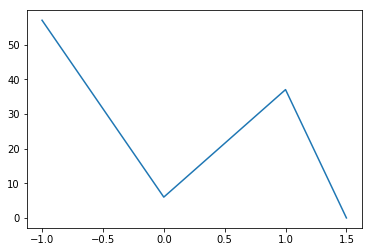

In [132]:
plt.plot([-1,0,1,1.5],countRewardTest)
plt.show()

It seems the no of black jack game won has increasted after choosing the right parameters

# V. Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it.

I am able to learn Reinforcement algorithm through this assignment. Thank you.

# Extra Credit

- Let us have Blackjack-V0 Tournament in class (Mar 22nd.)!
- Top 4 students will get an extra credit. 
- 2 (or more?) unique training attemps will also get an extra credit. (Sales for it to be considered.) 

## Grading

We will test your notebook with an additional grid.txt file. Please make sure to test in different maze input files. 

points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Maze Problem | 
 | 5| Includes description of maze problem
 | 5| Explains the GridWorld
10 | Blackjack
 | 5| Includes description of maze problem
 | 5| Explains the Backjack-V0 (OpenAI Gym)
25 | Methods | 
 | 5| Review of the SARSA and Q-Learning
 | 5| Choice of TD learning and Reason
 |10| Implementation of the selected approach
 | 5| explanation of the codes
45 | Results 
| 5| Reports the selected parameters for both problems. 
|20| Experimental outputs that show the choice of parameters. How do you choose them? (10 points per each problem)
|10| Output plots (5 for each)
|10| reading and analysis of learning results and plots (5 for each)
5 | Conclusions 
